In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prepare_yerevan_data import prepare_yerevan_data_nitrogen_dioxide
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

In [2]:
air_data = prepare_yerevan_data_nitrogen_dioxide()
air_data.head()

,temperature_2m,wind_speed_10m,relative_humidity_2m,precipitation,surface_pressure,pm10,pm2_5,nitrogen_dioxide,is_busy,hour_sin,hour_cos,temperature_rolling_3h_mean,temperature_rolling_6h_mean,temperature_rolling_12h_mean,temperature_rolling_24h_mean
24,-0.4,1.360977,62,0.0,906.0,2.595255,2.468100,29.3,0,0.000000,1.000000,-0.633333,-0.233333,1.083333,1.587500
25,0.2,1.193922,58,0.0,907.4,2.484907,2.397895,25.4,0,0.258819,0.965926,-0.433333,-0.583333,0.575000,1.570833
26,-2.1,1.609438,67,0.0,906.4,2.442347,2.351375,22.8,0,0.500000,0.866025,-0.100000,-0.466667,0.250000,1.583333
27,-1.4,1.629241,62,0.0,906.4,2.451005,2.292535,20.9,0,0.707107,0.707107,-0.766667,-0.700000,0.016667,1.454167
28,-2.1,1.589235,66,0.0,905.9,2.433613,2.312535,18.1,0,0.866025,0.500000,-1.100000,-0.766667,-0.075000,1.387500


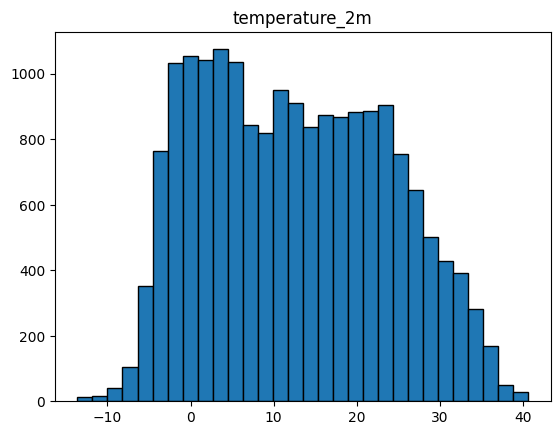

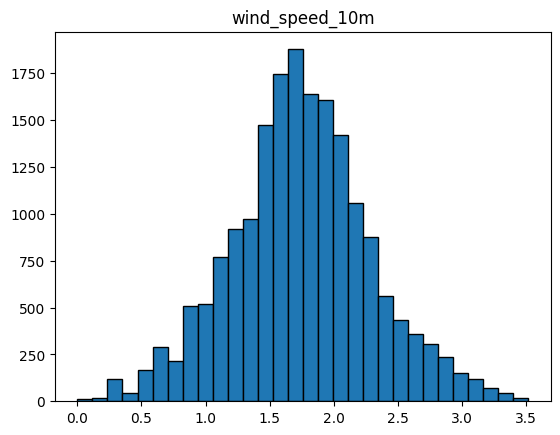

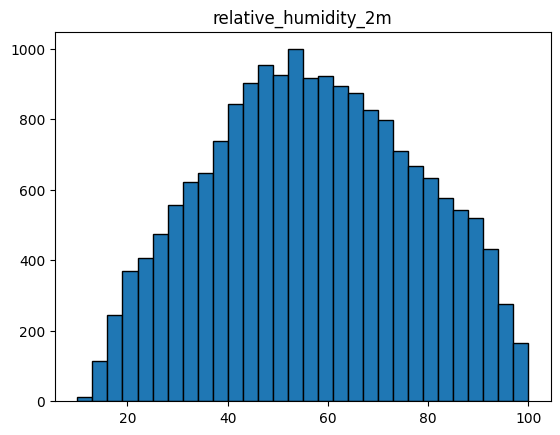

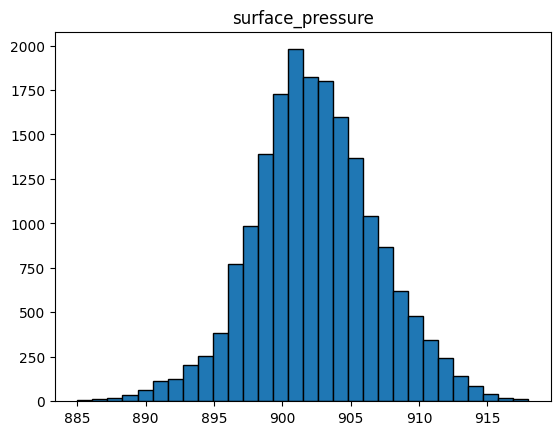

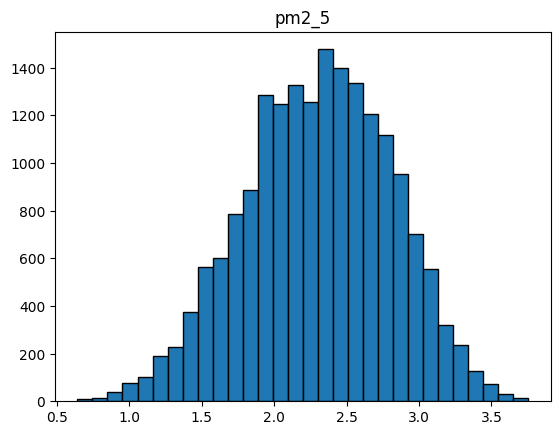

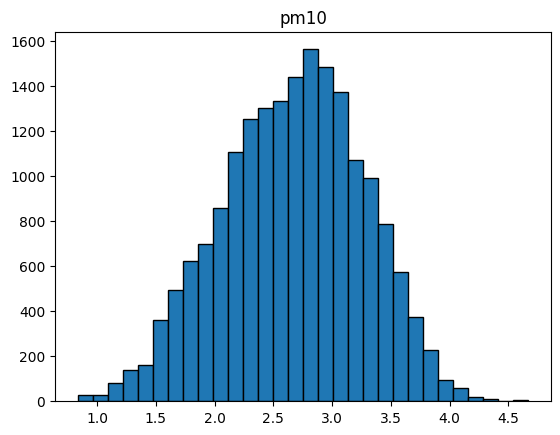

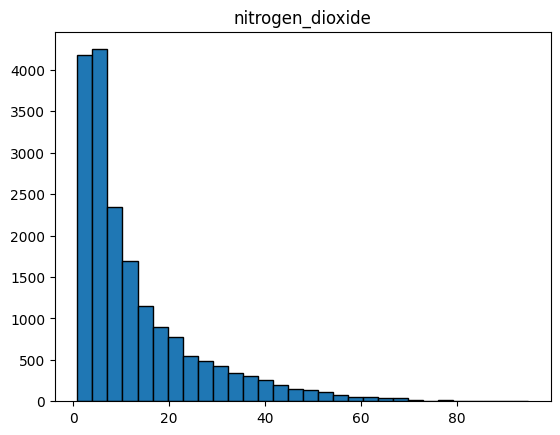

In [3]:
columns = ['temperature_2m',
           'wind_speed_10m',
           'relative_humidity_2m',
           'surface_pressure',
           'pm2_5',
           'pm10',
           'nitrogen_dioxide'
           ]

for col in columns:
    plt.title(col)
    plt.hist(air_data[col], edgecolor='k', bins=30)
    plt.show()

In [4]:
y = air_data['nitrogen_dioxide']
X = air_data.drop(columns=['nitrogen_dioxide'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=False)

In [5]:
model = XGBRegressor(
    random_state=42,
    gamma=0.15,
    learning_rate=0.005,
    n_estimators=2500,
    max_depth=3,
)

In [6]:
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [7]:
y_pred = model.predict(X_test)

In [8]:
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.3f}")
print(f"R^2: {r2_score(y_test, y_pred):.3f}")

MAE: 5.422
RMSE: 7.872
R^2: 0.734


In [9]:
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                         Feature  Importance
11   temperature_rolling_6h_mean    0.398717
10   temperature_rolling_3h_mean    0.162984
7                        is_busy    0.108575
9                       hour_cos    0.072494
5                           pm10    0.060443
13  temperature_rolling_24h_mean    0.055344
8                       hour_sin    0.048565
6                          pm2_5    0.048285
2           relative_humidity_2m    0.010400
12  temperature_rolling_12h_mean    0.010032
1                 wind_speed_10m    0.008585
4               surface_pressure    0.008564
0                 temperature_2m    0.004271
3                  precipitation    0.002741
